<a href="https://colab.research.google.com/github/aastha2003gupta/Sentiment_Analyser/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
Setting up a Python environment for text analysis and visualization. It includes libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib and Seaborn for visualization, and NLTK for natural language processing tasks. The NLTK downloads essential resources like tokenizers, part-of-speech taggers, and sentiment analysis lexicons. The chosen style for Matplotlib plots is 'ggplot.'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Read and Visualize data
Using Pandas to read a CSV file named 'Reviews.csv' into a DataFrame (df). It then displays the first few rows of the DataFrame using the head() method. The code extracts and prints the value of the 'Text' column from the first row. The shape of the DataFrame is printed using df.shape, and finally, it limits the DataFrame to the first 450 rows using df.head(450).

In [ ]:
df=pd.read_csv('/content/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df.shape

(1499, 10)

In [ ]:
df=df.head(450)

# Analysis of score
Calculating the count of unique values in the 'Score' column of the DataFrame (df). It then sorts the counts based on the index (which represents the unique score values). The result is a series showing the distribution of scores in ascending order.

In [ ]:
df['Score'].value_counts().sort_index()

1     36
2     15
3     35
4     59
5    305
Name: Score, dtype: int64

observation:
*most reviews are positive
*there is a sharp dip after the 5th rating

# Basic NLTK
Natural language processing and sentiment analysis using the NLTK library. It processes the text in the 'Text' column of a DataFrame (df), tokenizes it, performs part-of-speech tagging, and identifies named entities. It then uses the SentimentIntensityAnalyzer from NLTK to calculate sentiment scores for a specific example and later iterates over the entire DataFrame to create a sentiment analysis DataFrame (result_df). Finally, it creates a bar plot using Seaborn, showing the compound sentiment scores grouped by the 'Score' column.

In [ ]:
example=df['Text'][10]

In [ ]:
tokens=nltk.word_tokenize(example)

In [ ]:
#finding part of speech
tagged=nltk.pos_tag(tokens)

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


Vader sentiment scoring
(uses bag of words approach, stop words removed , each word scored and added to total score)


*   Positive
*   Negative
*   Neutral

Doesn't consider realtionships between words









In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sent=SentimentIntensityAnalyzer()


In [ ]:
sent.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [ ]:
#loop it over
result={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  id=row['Id']
  result[id]=sent.polarity_scores(text)

  0%|          | 0/450 [00:00<?, ?it/s]

In [ ]:
result_df=pd.DataFrame(result).T

In [ ]:
result_df.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [ ]:
result_df=result_df.reset_index().rename(columns={'index':'Id'})
result_df=result_df.merge(df,how='left')

In [ ]:
result_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,0.077,0.780,0.143,0.3699,B000G6RYNE,A19G8B2QYETD7W,NyahNyah,0,0,3,1297555200,Heavy on the Vinegar,"I usually love Kettle Chips, and love salt & v..."
446,447,0.042,0.763,0.195,0.9883,B000G6RYNE,A3PZ4AXTY9J1DZ,Jason Ralsky,0,0,4,1295913600,"A delicious, crisp chip with good flavor",I have always been a fan of Kettle chips. Whe...
447,448,0.000,0.713,0.287,0.9670,B000G6RYNE,ACFPHOYVB71V4,karob,0,0,5,1292630400,BEST BUY in BBQ Chips,Tried many varieties of BBQ chips and hands do...
448,449,0.000,0.737,0.263,0.8531,B000G6RYNE,A1H80WDFOR94Q5,Injured Panda,0,0,5,1290556800,Love Them!,Kettle chis are the best ever! These used to b...


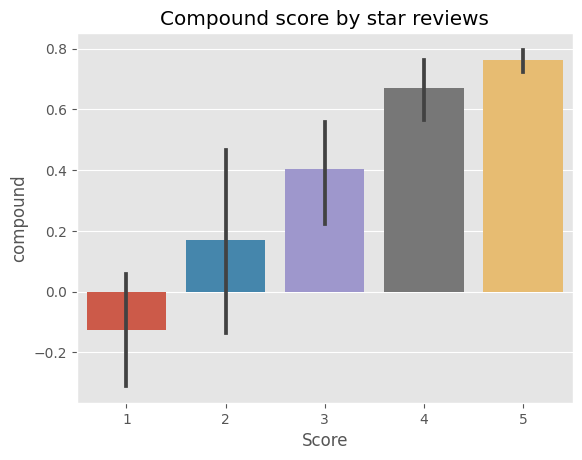

In [ ]:
plott=sns.barplot(data=result_df,x='Score',y='compound')
plott.set_title('Compound score by star reviews')
plt.show()

# Roberta pretrained model (for large datasets,takes care of not only words but also context)
Integrating the Hugging Face Transformers library to perform sentiment analysis using the Twitter RoBERTa model (cardiffnlp/twitter-roberta-base-sentiment). It defines a function roberta_score to obtain sentiment scores for a given example using the RoBERTa model. The sentiment scores from both VADER (NLTK) and RoBERTa are combined into a DataFrame (final_df) by iterating over the original DataFrame (df). In case of a RuntimeError, the code prints a message indicating that the process broke for a specific ID. The resulting DataFrame contains sentiment scores from both VADER and RoBERTa, along with the original data from df.


In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def roberta_score(example):
    encoded = tokenizer(example, return_tensors='pt')
    output = model(**encoded)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
result= {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        id = row['Id']
        vader_result = sent.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_score(text)
        both = {**vader_result_rename, **roberta_result}
        result[id] = both
    except RuntimeError:
        print(f'Broke for id {id}')

  0%|          | 0/450 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [ ]:
final_df = pd.DataFrame(result).T
final_df = final_df.reset_index().rename(columns={'index': 'Id'})
final_df = final_df.merge(df, how='left')

# Comparizon of scores generated by both the models
Seaborn to create a pair plot to visualize relationships between pairs of sentiment scores (negative, neutral, and positive) from both VADER and the RoBERTa model. The hue parameter is set to the 'Score' column, which likely represents the sentiment label assigned to the text. The color palette 'tab10' is used to distinguish different score categories. The vars parameter specifies the variables to include in the pair plot, and in this case, it includes sentiment scores from both VADER and RoBERTa.

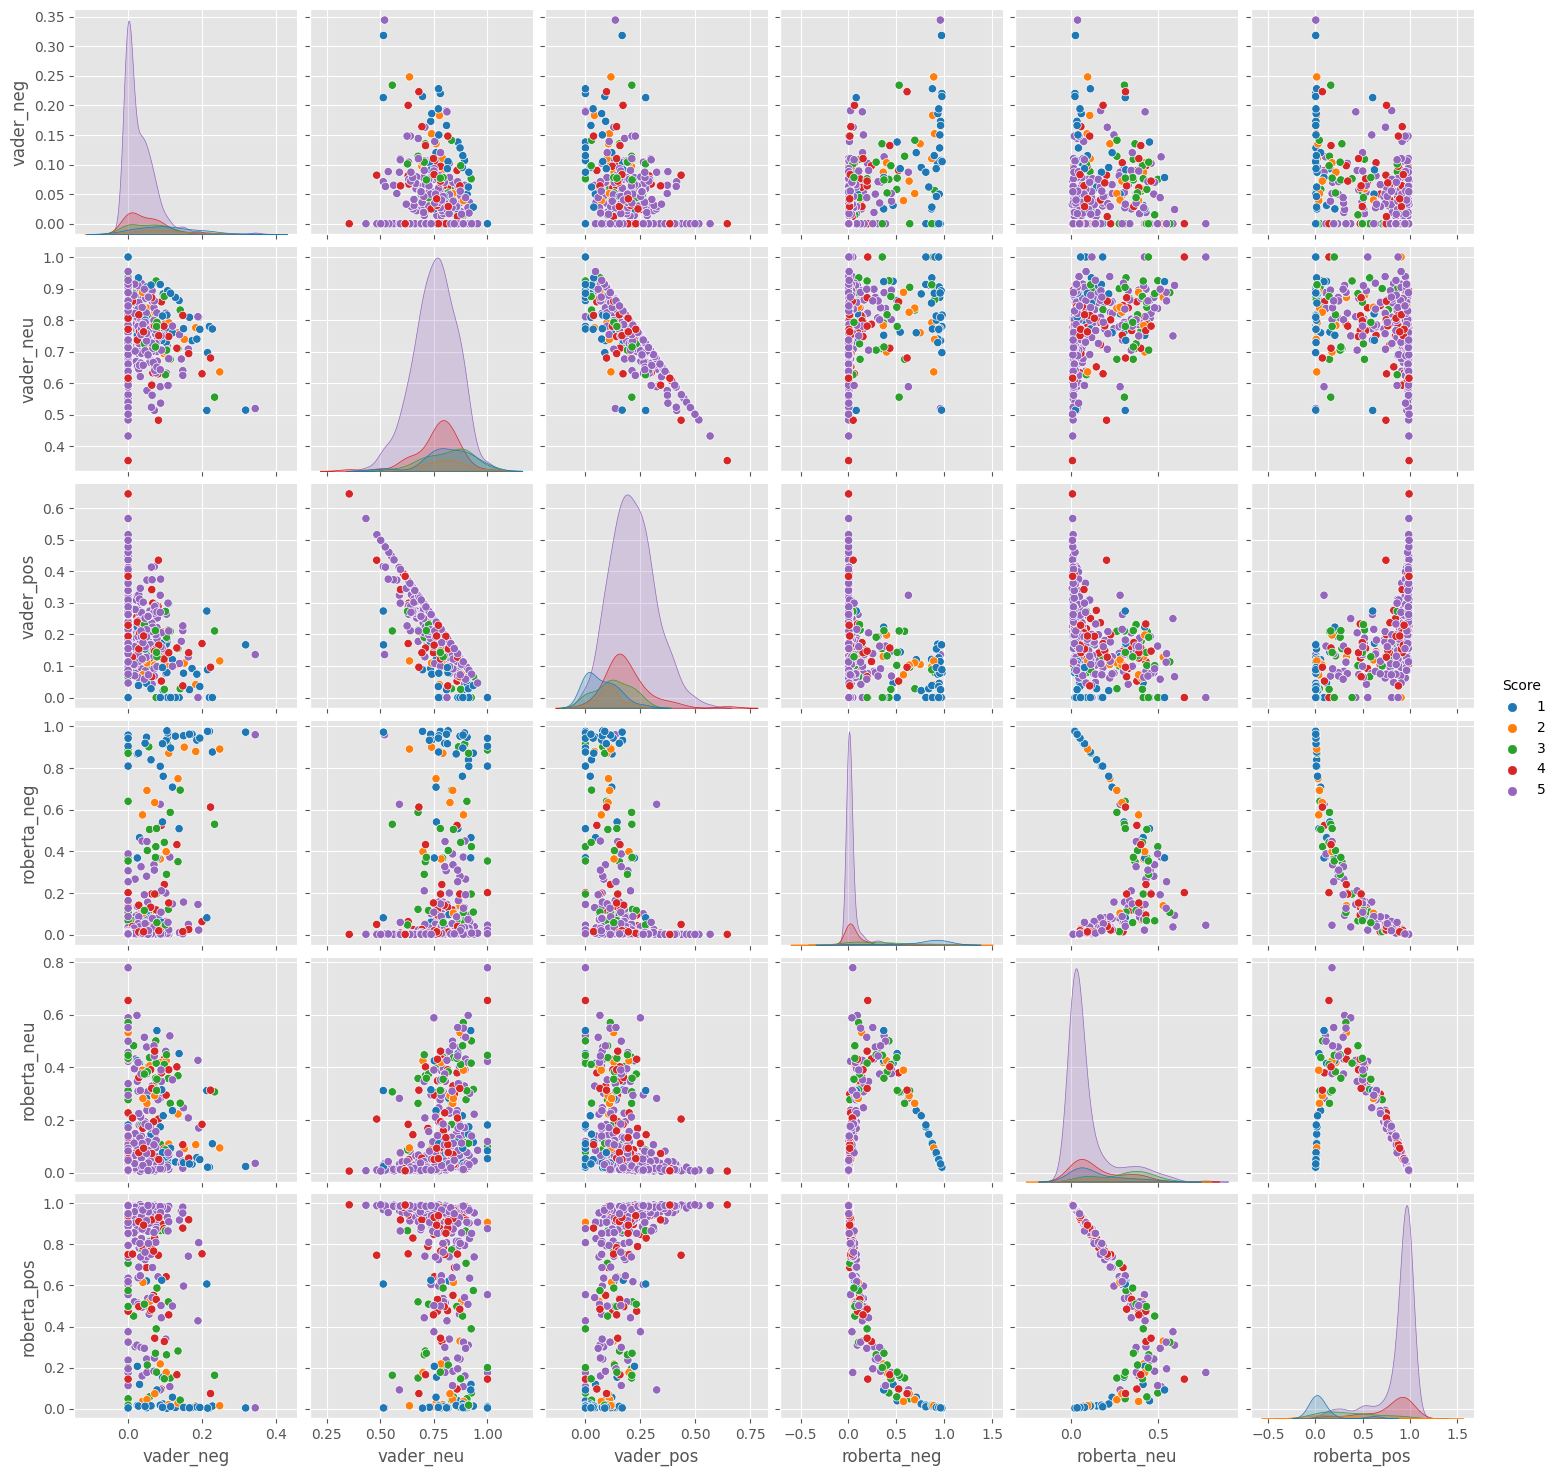

In [ ]:
sns.pairplot(data=final_df,vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')

# Analysis wrt scores and stars
Utilizing sentiment analysis using both VADER (NLTK) and the RoBERTa model from Hugging Face Transformers on a DataFrame containing text data. It creates a comprehensive DataFrame (final_df) that combines sentiment scores from both models. Additionally, the code generates visual insights through a Seaborn pair plot, illustrating relationships between sentiment scores. The last section queries the DataFrame to retrieve text examples with extreme sentiment scores according to both VADER and RoBERTa models.

In [ ]:
final_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [ ]:
final_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
final_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
final_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Tranformers Pipeline (easy to run sentiment predictions)
 Hugging Face Transformers library to load a pre-trained sentiment analysis pipeline. The pipeline is created using the pipeline function with the argument "sentiment-analysis". This pipeline allows for straightforward sentiment analysis on input text, and it's named sentiment_pipeline in this case.





In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Testing the pipeline

In [ ]:
sentiment_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]